# Importing necessary libraries


In [ ]:
import numpy as np 
import pandas as pd 
import os
import math
import seaborn as sns
import datetime as dt
from datetime import datetime  
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

# **CNN-LSTM MODEL**

# Loading the dataset.

In [ ]:
df = pd.read_csv('/content/Sample - Superstore.csv',encoding='Latin', parse_dates=["Order Date"])
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.describe()  

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [ ]:
# Dropping the column 'Row ID', as it does not help much in the process of data analysis of the dataset.
df.drop('Row ID',axis = 1, inplace = True)

In [ ]:
print('Order Date Description\n') 
print(df['Order Date'].describe()) #Displays the distribution of dates in 'Order Data' column
print('\nShip Date Description\n')
print(df['Ship Date'].describe()) #Displays the distribution of dates in 'Ship Data' column

Order Date Description

count                    9994
unique                   1237
top       2016-09-05 00:00:00
freq                       38
first     2014-01-03 00:00:00
last      2017-12-30 00:00:00
Name: Order Date, dtype: object

Ship Date Description

count           9994
unique          1334
top       12/16/2015
freq              35
Name: Ship Date, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


In [ ]:
#sorting data by order date
df.sort_values(by=['Order Date'], inplace=True, ascending=True) #Sorting data by  ascending order of the coloumn values 'Order Date'
df.set_index("Order Date", inplace = True) #Setting 'Order Date' as index of the dataframe 'df' for ease of Time Series Analysis


In [ ]:
store=[]
df1 = df.groupby('Sub-Category')['Quantity'].sum()
df1 = df1.sort_values(ascending=False)
for i in df1.keys():
  store.append(i)

df = df[df['Sub-Category']==store[0]]

In [ ]:
# To forecast sales seven days later of the order date, let us create a new dataframe with only the target column i.e, 
# the 'Sales' column and 'Order Date' as the index 

new_data = pd.DataFrame(df['Quantity'])
new_data

,Quantity
Order Date,
2014-01-04,2
2014-01-06,2
2014-01-07,7
2014-01-13,3
2014-01-13,2
...,...
2017-12-28,2
2017-12-29,1
2017-12-30,2


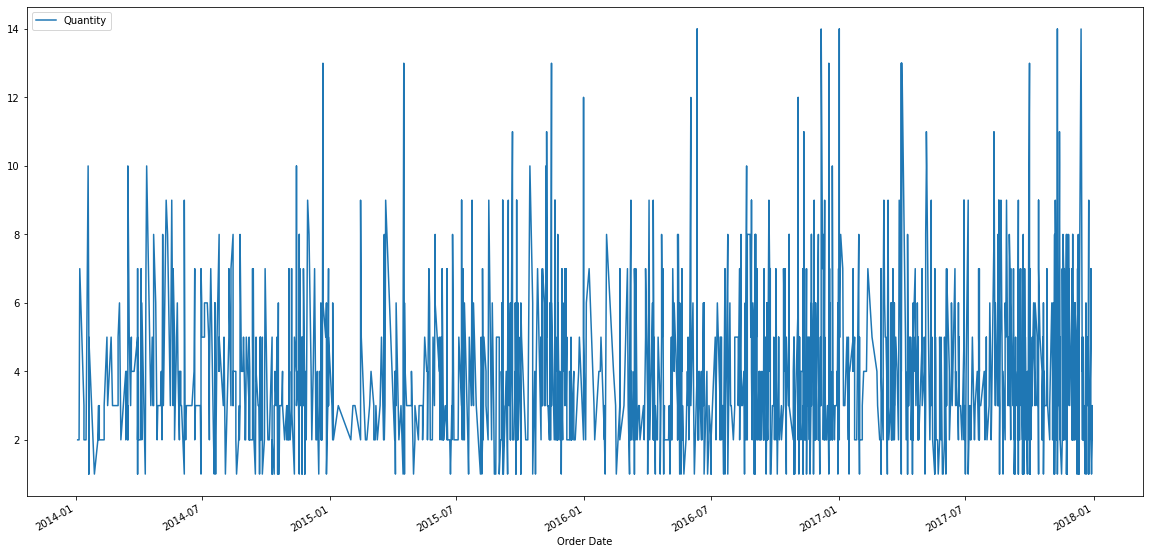

In [ ]:
#Plotting the data to understand the sales distribution from the year 2014-2018
new_data.plot();

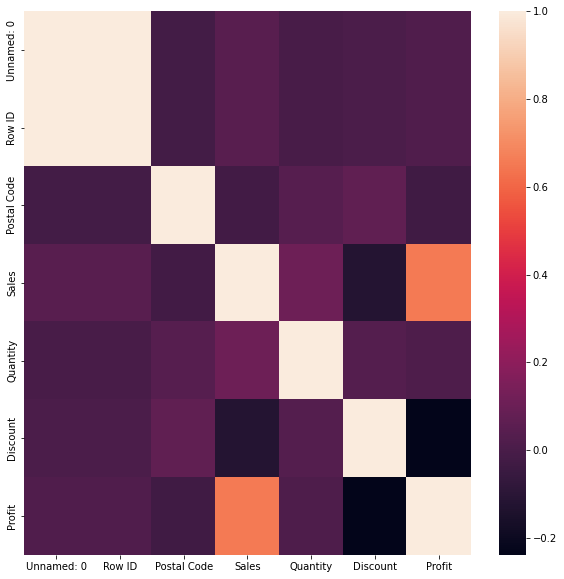

In [ ]:
# Check for factors responsible in overall volume trade
fig, ax = plt.subplots (figsize = (10, 10))
df_item1 = pd.read_csv('/content/item1.csv',encoding='Latin',parse_dates=["Order Date"])
corr_matrix = df_item1.corr() # Perform default correlation using Pearson Method 

# Plot the correlation matrix in a heatmap to understand better
sns.heatmap(corr_matrix, xticklabels = corr_matrix.columns.values, yticklabels = corr_matrix.columns.values)